<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/Kiparenko-Nikolai-folder/Kiparenko%20Nikolai/INSPECTRUM_CLINIC_HR_RECSYS_GR1_06.06.2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autokeras

In [ ]:
# Работа с массивами данных
import numpy as np 

# Работа с таблицами
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, ReLU 

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Кодирование тестовых меток
from sklearn.preprocessing import LabelEncoder

# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

import autokeras as ak

# автоматически парсит строку и сохранит ее в переменной datetime
import datetime

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re

# Запись в файлы и чтение из файлов структур данных Python
import pickle

# Отрисовка графиков
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
import gdown                                      # Подключим функцию gdown
#Грузим файл
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_HR/datasets/%D0%94%D0%B0%D1%82%D0%B0%D0%A1%D0%B5%D1%82%20%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5%20581%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5.xlsx','dataS.xlsx', quiet=True)   

'dataS.xlsx'

In [91]:
#Читаем файл
data = pd.read_excel (r'dataS.xlsx', index_col=0)
data.max_columns = 30
data.columns = ['Response_date', 'Full_name', 'Gender', 'Salary', 'Job', 'City', 'Employment', 'Schedule', 'Experience', 'Last_place', 'Position', 'Education', 'Update_resume', 'Suitable']

In [116]:
data.to_csv('data.csv')

In [ ]:
data = data.loc[data['Job'] == 'Growth Product Manager']
data = data.iloc[:20]

In [ ]:
data.head(20)

,Response_date,Full_name,Gender,Salary,Job,City,Employment,Schedule,Experience,Last_place,Position,Education,Update_resume,Suitable
0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да
5,2023-02-25 00:00:00,Bessonova Mariya,"Женщина, 31 год, родилась 26 июня 1991",120 000 руб.,Product manager в Growth Hacking команду,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 11 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2014, Университет Российской академии ...",23 февраля 2023 в 16:46,да
6,2023-02-26 00:00:00,Ермакова Лилия,"Женщина, 36 лет, родилась 20 марта 1987",100 000 руб.,Директор медицинской клиники,"Уфа, Не готова к переезду, готова к редким ком...","полная занятость, частичная занятость, проектн...","полный день, гибкий график",Опыт работы —13 лет 9 месяцев,"ОАО ""Фармстандарт-УфаВИТА""",Начальник участка инъекционных препаратов,"Высшее, 2009, Башкирский государственный аграр...",9 марта 2023 в 22:27,да
7,2023-01-26 00:00:00,Маннанова Ксения Дмитриевна,"Женщина, 24 года, родилась 27 апреля 1998",30 000 руб.,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —5 лет,Tiqum,Контент-менеджер,"Среднее специальное, 2018, УТЭК",15 февраля 2023 в 10:38,да
8,2023-02-28 00:00:00,Ахметьянова Кристина,"Женщина, 31 год, родилась 16 июля 1991",40 000 руб.,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —10 лет 3 месяца,МБОУ СОШ,Учитель русского языка и литературы,"Магистр, 2015, Башкирский государственный педа...",26 марта 2023 в 19:29,да
9,2023-02-20 00:00:00,Иванова Дарья Дмитриевна,"Женщина, 28 лет, родилась 5 декабря 1994",не указана,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —4 года 4 месяца,"Газпромбанк, ОАО",Специалист,"Среднее специальное, 2014, Уфимский Политехнич...",1 марта 2023 в 13:26,да


In [92]:
#Разбираем Дату раждения
Birth = data['Gender'].apply(lambda x: x.split(',')[2].strip() if len(x.split(','))>2 else '')
data = data.assign(Birth=Birth)
#Разбираем Возраст
Age = data['Gender'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')
data = data.assign(Age=Age)

In [93]:
#Тип образования
DegreeOfStudy = data['Education'].apply(lambda x: x.split(',')[0].strip() if len(x.split(','))>1 else '')
data = data.assign(DegreeOfStudy=DegreeOfStudy)
#Год окончания образования
YearOfGraduation = data['Education'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')
data = data.assign(YearOfGraduation=YearOfGraduation)

In [94]:
#Формируем список месяцев
month_name = {1: 'января', 2: 'февраля', 3: 'марта', 4: 'апреля', 5: 'мая', 6: 'июня',
      7: 'июля', 8: 'августа', 9: 'сентября', 10: 'октября', 11: 'ноября', 12: 'декабря'}


In [ ]:
for i, row in data.iterrows():
  #Gender
  row.Gender = row.Gender.split(',')[0].strip() 
  #Женщина = 0, Мужчина = 1
  row.Gender = row.Gender.replace('Женщина','0')
  row.Gender = row.Gender.replace('Мужчина','1')
  row.Gender = int(row.Gender)

  #Birth
  row.Birth = row.Birth.replace('родился','')
  row.Birth = row.Birth.replace('родилась','')
 
  #Age
  row.Age = row.Age.replace('года','')
  row.Age = row.Age.replace('год','')
  row.Age = row.Age.replace('лет','')
  row.Age = row.Age='' if 0 else row.Age

  try:
    row.Age = int(row.Age)
  except (IndexError, TypeError, ValueError):
    print(row.Age)
    row.Age = 0

  try:
      row.YearOfGraduation = int(row.YearOfGraduation)
  except (IndexError, TypeError, ValueError):
      print(row.YearOfGraduation)
      row.YearOfGraduation = 0

  #Salary
  row.Salary = row.Salary.replace(' ','') 
  row.Salary = str(float(row.Salary.replace('KGS',''))*0.89)      if row.Salary.find('KGS') != -1 else row.Salary
  row.Salary = str(float(row.Salary.replace('KZT',''))*0.18)      if row.Salary.find('KZT') != -1 else row.Salary
  row.Salary = str(float(row.Salary.replace('USD',''))*78.00)     if row.Salary.find('USD') != -1 else row.Salary
  row.Salary = str(float(row.Salary.replace('EUR',''))*85.00)     if row.Salary.find('EUR') != -1 else row.Salary
  row.Salary = row.Salary.replace('руб.','')
  row.Salary = row.Salary.replace('руб','')
  row.Salary = row.Salary.replace('неуказана','0')
  row.Salary = int(float(row.Salary)) 

  #Experience
  row.Experience = row.Experience.replace('Опыт работы —','')
  row.Experience = row.Experience.replace('Опыт работы','')
  row.Experience = row.Experience.replace('года',';')
  row.Experience = row.Experience.replace('лет',';')
  row.Experience = row.Experience.replace('годов',';')
  row.Experience = row.Experience.replace('год',';')
  row.Experience = row.Experience.replace('года',';')
  row.Experience = row.Experience.replace('месяцев','')
  row.Experience = row.Experience.replace('месяца','')
  row.Experience = row.Experience.replace('месяц','')
  row.Experience = row.Experience.replace('нет','0')
  #Приводим к месяцам, если были года умножаем на 12 иначе берем как есть 
  row.Experience = (int(row.Experience.split(';')[0].strip()) * 12 + (int(row.Experience.split(';')[1].strip())) if row.Experience.split(';')[1].strip() != '' else int(row.Experience.split(';')[0].strip()) * 12) if len(row.Experience.split(';')) >1 else int(row.Experience.strip()) 

  #Schedule
  #вахтовый метод = 0, удаленная работа = 1, гибкий график = 2, полный день = 3, сменный график = 4
  row.Schedule = row.Schedule.replace('вахтовый метод','0')
  row.Schedule = row.Schedule.replace('удаленная работа','1')
  row.Schedule = row.Schedule.replace('гибкий график','2')
  row.Schedule = row.Schedule.replace('полный день','3')
  row.Schedule = row.Schedule.replace('сменный график','4')

  #Employment
  #проектная работа = 0, неполный рабочий день = 1, полный рабочий день = 2, полная занятость = 3, частичная занятость = 4, стажировка = 5, волонтерство = 6
  row.Employment = row.Employment.replace('проектная работа','0')
  row.Employment = row.Employment.replace('неполный рабочий день','1')
  row.Employment = row.Employment.replace('полный рабочий день','2')
  row.Employment = row.Employment.replace('полная занятость','3')
  row.Employment = row.Employment.replace('частичная занятость','4')
  row.Employment = row.Employment.replace('стажировка','5')
  row.Employment = row.Employment.replace('волонтерство','6')

  #Birth
  for i in month_name:
     row.Birth         = row.Birth.replace(month_name[i],'-'+str(i)+'-')
 
  row.Birth         = row.Birth.replace('родился','')
  row.Birth         = row.Birth.replace('родилась','')
  row.Birth         = row.Birth.replace(' -','-')
  row.Birth         = row.Birth.replace('- ','-')
  row.Birth         = row.Birth+' 00:00:00'

  row.Birth = '1-1-1' +row.Birth if row.Birth == ' 00:00:00' else row.Birth
  day = int(row.Birth.split('-')[0].strip()) 
  month = int(row.Birth.split('-')[1].strip()) 
  year = row.Birth.split('-')[2].strip() 
  time = year.split(' ')[1].strip()
  year = int(year.split(' ')[0].strip())

  row.Birth = int(datetime.datetime(year,month,day).utcnow().timestamp())

  #Update_resume 
  for i in month_name:
    row.Update_resume = row.Update_resume.replace(month_name[i],'-'+str(i)+'-')
 
  row.Update_resume = row.Update_resume.replace('в','')
  row.Update_resume = row.Update_resume.replace(' -','-')
  row.Update_resume = row.Update_resume.replace('- ','-')
  row.Update_resume = row.Update_resume+':00'

  day = int(row.Update_resume.split('-')[0].strip()) 
  month = int(row.Update_resume.split('-')[1].strip()) 
  year = row.Update_resume.split('-')[2].strip() 
  year = year.replace('  ',';')
  year = year.replace(' ',';')
   
  time = year.split(';')[1].strip()
  year = int(year.split(';')[0].strip())
  hour = int(time.split(':')[0].strip())
  minute = int(time.split(':')[1].strip())

  row.Update_resume = int(datetime.datetime(year,month,day,hour,minute,0).utcnow().timestamp())

  #Response_date
  row.Response_date = int(datetime.datetime.utcnow().timestamp())

In [96]:
#Переведем в бинарные значения

#проектная работа = 0, неполный рабочий день = 1, полный рабочий день = 2, полная занятость = 3, частичная занятость = 4, стажировка = 5, волонтерство = 6
Employment_0 = data['Employment'].apply(lambda x: 1 if x.find('0') else 0)
Employment_1 = data['Employment'].apply(lambda x: 1 if x.find('1') else 0)
Employment_2 = data['Employment'].apply(lambda x: 1 if x.find('2') else 0)
Employment_3 = data['Employment'].apply(lambda x: 1 if x.find('3') else 0)
Employment_4 = data['Employment'].apply(lambda x: 1 if x.find('4') else 0)
Employment_5 = data['Employment'].apply(lambda x: 1 if x.find('5') else 0)
Employment_6 = data['Employment'].apply(lambda x: 1 if x.find('6') else 0)

data = data.assign(Employment_0=Employment_0,
                    Employment_1=Employment_1,
                    Employment_2=Employment_2,
                    Employment_3=Employment_3,
                    Employment_4=Employment_4,
                    Employment_5=Employment_5,
                    Employment_6=Employment_6)

#вахтовый метод = 0, удаленная работа = 1, гибкий график = 2, полный день = 3, сменный график = 4
Schedule_0 = data['Schedule'].apply(lambda x: 1 if x.find('0') else 0)
Schedule_1 = data['Schedule'].apply(lambda x: 1 if x.find('1') else 0)
Schedule_2 = data['Schedule'].apply(lambda x: 1 if x.find('2') else 0)
Schedule_3 = data['Schedule'].apply(lambda x: 1 if x.find('3') else 0)
Schedule_4 = data['Schedule'].apply(lambda x: 1 if x.find('4') else 0)

data = data.assign(Schedule_0=Schedule_0,
                    Schedule_1=Schedule_1,
                    Schedule_2=Schedule_2,
                    Schedule_3=Schedule_3,
                    Schedule_4=Schedule_4)

data = data.drop(columns=['Schedule', 'Employment'])

In [97]:
#City
tokenizer = Tokenizer(num_words=30, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.City) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
City_Indexes = tokenizer.texts_to_sequences(data.City)
data = data.assign(City=City_Indexes)

In [98]:
#Full_name
tokenizer = Tokenizer(num_words=100, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.Full_name)

Full_name_Indexes = tokenizer.texts_to_sequences(data.Full_name) 
data = data.assign(Full_name=Full_name_Indexes)

In [99]:
#Education
tokenizer = Tokenizer(num_words=200, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.Education) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

Education_Indexes = tokenizer.texts_to_sequences(data.Education) 
data = data.assign(Education=Education_Indexes)

In [100]:
#DegreeOfStudy
tokenizer = Tokenizer(num_words=20, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.DegreeOfStudy) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

DegreeOfStudy_Indexes = tokenizer.texts_to_sequences(data.DegreeOfStudy) 
data = data.assign(DegreeOfStudy=DegreeOfStudy_Indexes)

In [101]:
#Job
tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.Job) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

Job_Indexes = tokenizer.texts_to_sequences(data.Job) 
data = data.assign(Job=Job_Indexes)

In [102]:
#Last_place
tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.Last_place) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

Last_place_Indexes = tokenizer.texts_to_sequences(data.Last_place) 
data = data.assign(Last_place=Last_place_Indexes)

In [103]:
#Position
tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.Position) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

Position_Indexes = tokenizer.texts_to_sequences(data.Position) 
data = data.assign(Position=Position_Indexes)

In [104]:
#Suitable
#Список ответов делаем
listAnswers = []
#Обработаем отдельно колонку с ответами
for i, row in data.iterrows():
   a = 1 if str(row.Suitable).find('да') != -1 else 0
   listAnswers.append([a])
answers = np.array(listAnswers)
print(answers.shape)

(579, 1)


In [ ]:
data = data.drop(columns=['Suitable'])

In [114]:
#data = data.drop(columns=['Response_date'])

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 581
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Full_name         579 non-null    object
 1   Gender            579 non-null    int64 
 2   Salary            579 non-null    int64 
 3   Job               579 non-null    object
 4   City              579 non-null    object
 5   Experience        579 non-null    object
 6   Last_place        579 non-null    object
 7   Position          579 non-null    object
 8   Education         579 non-null    object
 9   Update_resume     579 non-null    int64 
 10  Suitable          500 non-null    object
 11  Birth             579 non-null    int64 
 12  Age               579 non-null    int64 
 13  DegreeOfStudy     579 non-null    object
 14  YearOfGraduation  579 non-null    int64 
 15  Employment_0      579 non-null    int64 
 16  Employment_1      579 non-null    int64 
 17  Employment_2    

In [105]:
#Приведим все списки к однообразию
data.Response_date = data.Response_date.astype('int')
data.Gender = data.Gender.astype('int')
data.Salary = data.Salary.astype('int')
data.Update_resume = data.Update_resume.astype('int')
data.Birth = data.Birth.astype('int')
data.Age = data.Age.astype('int')
data.YearOfGraduation = data.YearOfGraduation.astype('int')

#Находим максимальную длину
Full_nameMaxI = 0
PositionMaxI = 0
Last_placeMaxI = 0
JobMaxI = 0
EducationMaxI = 0
CityMaxI = 0
DegreeOfStudyMaxI = 0
for i, row in data.iterrows():
    Full_nameMaxI   = max(Full_nameMaxI,len(row.Full_name))
    PositionMaxI    = max(PositionMaxI,len(row.Position))
    Last_placeMaxI  = max(Last_placeMaxI,len(row.Last_place))
    JobMaxI         = max(JobMaxI,len(row.Job))
    EducationMaxI   = max(EducationMaxI,len(row.Education))
    CityMaxI        = max(CityMaxI,len(row.City))
    DegreeOfStudyMaxI        = max(DegreeOfStudyMaxI,len(row.DegreeOfStudy))

In [106]:
#обрабатываем данные list
dataList = [] 
for i, row in data.iterrows():
      row.Full_name     = np.array(row.Full_name+[0 for x in range(Full_nameMaxI-len(row.Full_name))])
      row.Position      = np.array(row.Position+[0 for x in range(PositionMaxI-len(row.Position))])
      row.Last_place    = np.array(row.Last_place+[0 for x in range(Last_placeMaxI-len(row.Last_place))])
      row.Job           = np.array(row.Job+[0 for x in range(JobMaxI-len(row.Job))])
      row.Education     = np.array(row.Education+[0 for x in range(EducationMaxI-len(row.Education))])
      row.City          = np.array(row.City+[0 for x in range(CityMaxI-len(row.City))])
      row.DegreeOfStudy          = np.array(row.DegreeOfStudy+[0 for x in range(DegreeOfStudyMaxI-len(row.DegreeOfStudy))])
       
      #row_data = np.hstack(row)
      row_data = np.hstack([
                            row.Full_name,
                            row.Position,
                            row.Last_place,
                            row.Job,
                            row.Education,
                            row.City,
                            row.Response_date,
                            row.Gender,
                            row.Salary,
                            row.Update_resume,
                            row.Birth,
                            row.Age,
                            row.YearOfGraduation,
                            row.DegreeOfStudy,
                            row.Employment_0,
                            row.Employment_1,
                            row.Employment_2,
                            row.Employment_3,
                            row.Employment_4,
                            row.Employment_5,
                            row.Employment_6,
                            row.Schedule_0,
                            row.Schedule_1,
                            row.Schedule_2,
                            row.Schedule_3,
                            row.Schedule_4]
                          )
      
      dataList.append(row_data)

dataset = np.array(dataList) #, dtype=np.float
print(dataset.shape)

(579, 217)


In [ ]:
data.info()

In [ ]:
#Смотрим что получилось
data.max_columns = 30
data.head(-15)

,Response_date,Full_name,Gender,Salary,Job,City,Experience,Last_place,Position,Education,...,Employment_2,Employment_3,Employment_4,Employment_5,Employment_6,Schedule_0,Schedule_1,Schedule_2,Schedule_3,Schedule_4
0,1685471549,"[6, 7]",0,90000,"[2, 3, 4]","[17, 8, 6, 2, 5, 8, 6, 2, 4]",70,"[5, 6, 7, 8]","[4, 7, 11]","[3, 27, 45, 12, 2, 46, 28, 47, 5]",...,1,1,1,1,1,1,0,1,1,1
1,1685471549,"[8, 9, 10]",0,0,"[2, 3, 4]","[7, 6, 2, 5, 6, 2, 4]",143,"[9, 10]","[2, 5, 12, 13, 8, 14]","[3, 13, 29, 30, 7, 48, 49, 14, 5]",...,1,0,1,1,1,1,0,1,1,1
2,1685471549,"[11, 12, 2]",1,150000,"[2, 3, 4]","[10, 11, 3, 2, 5, 7, 3, 2, 4]",86,"[11, 2]","[9, 7, 15, 8, 10, 4]","[3, 19, 15, 31, 4, 2, 50, 51, 9, 20, 15, 32]",...,1,1,1,1,1,1,0,1,1,1
3,1685471549,"[13, 14, 15]",1,0,"[2, 3, 4]","[7, 9, 18, 12, 13, 3, 2, 4]",106,[12],"[2, 3, 16, 17]","[52, 12, 7, 4, 10, 2, 6, 11, 21, 22, 5, 16, 7,...",...,1,1,1,0,1,1,0,1,1,1
4,1685471549,"[16, 17, 2]",1,150000,"[2, 3, 4]","[19, 12, 13, 3, 2, 4]",69,"[13, 14, 15, 16, 17]","[2, 18, 3]","[3, 33, 53, 34, 54, 55, 9, 56, 57, 58, 59, 60, 5]",...,1,1,1,1,1,1,0,1,1,1


In [ ]:
for row in dataset:
    print(dataset)

In [ ]:
# Делаем выборки для обучения
x_train, x_test, y_train, y_test = train_test_split(dataset, # набор параметров
                                                    answers, # набор меток классов
                                                    test_size=0.2, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=3) # воспроизводимость

In [ ]:
x_train.shape

(16, 82)

In [ ]:
x_test

In [ ]:
!pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()


In [120]:
df = h2o.import_file("data.csv")
y = 'Suitable'
x = df.columns
print(df)
x.remove(y)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
  C1  Full_name      Gender    Salary  Job                  City                             Experience  Last_place          Position               Education                                                                           Update_resume  Suitable          Birth    Age  DegreeOfStudy      YearOfGraduation    Employment_0    Employment_1    Employment_2    Employment_3    Employment_4    Employment_5    Employment_6    Schedule_0    Schedule_1    Schedule_2    Schedule_3    Schedule_4
   0  [1, 1]              0     90000  [4, 3, 2]            [1, 7, 6, 2, 5, 7, 6, 2, 4]              70  [107, 108, 64, 28]  [4, 5, 32]             [3, 76, 1, 43, 2, 50, 71, 103, 6]                                                     1.68608e+09  да          1.68608e+09      0  [2]                            2023               0               1               1               1               1              

In [121]:
aml_2 = H2OAutoML(max_models = 10, seed = 1)
aml_2.train(x = x, y = y, training_frame = df)

AutoML progress: |
19:49:45.5: _train param, Dropping bad and constant columns: [Employment_2, Employment_6, Employment_1]
19:49:45.494: XGBoost_1_AutoML_1_20230606_194944 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_1_20230606_194944_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.

19:49:45.559: _train param, Dropping bad and constant columns: [Employment_2, Employment_6, Employment_1]

█████
19:49:54.191: _train param, Dropping bad and constant columns: [Employment_2, Employment_6, Employment_1]
19:49:57.810: _train param, Dropping bad and constant columns: [Employment_2, Employment_6, Employment_1]
19:49:57.828: XGBoost_2_AutoML_1_20230606_194944 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_2_AutoML_1_20230606_194944_cv_1.  Details: ERRR on f

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_1_20230606_194944


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    41                 41                          10061                  1            11           3.85366       2             15            5.7561

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.009914243436525964
RMSE: 0.09957029394616632
LogLoss: 0.0482187845765996
Mean Per-Class Error: 0.09090909090909091
AUC: 0.9350250976017848
AUCPR: 0.9974557245796837
Gini: 0.8700501952035695

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8074735254049301
       да    нет    Error    Rate
-----  ----  -----  -------  -----------
да     9     2      0.1818   (2.0/11.0)
нет    0     489    0        (0.0/489.0)
Total  9     491    0.004    (2.0/500.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.807474     0.997959  361
max f2                       0.807474     0.999183  361
max f0point5                 0.828125     0.997955  359
max accuracy                 0.828125     0.996     359
max precision                1            1         0
max recall                   0.807474     1         361
max specificity              1            1         0
max absolute_mcc             0.828125     0.907046  359
max min_per_class_accuracy   0.938097     0.909091  316
max mean_per_class_accuracy  0.828125     0.953523  359
max tns                      1            11        0
max fns                      1            453       0
max fps                      0.215278     11        370
max tps                      0.807474     489       361
max tnr                      1            1         0
max fnr                      1            0.92638   0
max fpr                      0.215278     1         370
max tpr                      0.807474     1         361

Gains/Lift Table: Avg response rate: 97.80 %, avg score: 97.58 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.072                       1                  1.02249   1.02249            1                1         1                           1                   0.0736196       0.0736196                  2.24949   2.24949            0.0736196
2        0.118                       0.999805           1.02249   1.02249            1                0.999858  1                           0.999945            0.0470348       0.120654                   2.24949   2.24949            0.120654
3        0.174                       0.999618           1.02249   1.02249            1                0.999732  1                           0.999876            0.0572597       0.177914                   2.24949   2.24949            0.177914
4        0.232                       0.99937            1.02249   1.02249            1                0.999487  1                           0.999779            0.0593047       0.237219                   2.24949   2.24949            0.237219
5        0.348                       0.998705           1.00487   1.01662            0.982759         0.999113  0.994253                    0.999557            0.116

In [122]:
best_model_2 = aml_2.leader

In [123]:
lb = aml_2.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XRT_1_AutoML_1_20230606_194944,0.962447,0.0443259,0.99893,0.0909091,0.102089,0.0104221
DRF_1_AutoML_1_20230606_194944,0.935118,0.100108,0.996825,0.0454545,0.116825,0.013648
StackedEnsemble_AllModels_1_AutoML_1_20230606_194944,0.930935,0.0326128,0.99711,0.0909091,0.0691512,0.00478189
StackedEnsemble_BestOfFamily_1_AutoML_1_20230606_194944,0.917085,0.042553,0.995154,0.0909091,0.076244,0.00581315
GBM_4_AutoML_1_20230606_194944,0.911508,0.108485,0.995332,0.0515895,0.147104,0.0216396
GBM_grid_1_AutoML_1_20230606_194944_model_1,0.90779,0.0953594,0.994379,0.140454,0.145352,0.0211272
GBM_5_AutoML_1_20230606_194944,0.899238,0.0594123,0.997129,0.181818,0.109323,0.0119515
GBM_2_AutoML_1_20230606_194944,0.898215,0.0991504,0.994893,0.321249,0.14594,0.0212985
GBM_3_AutoML_1_20230606_194944,0.827477,0.117071,0.992576,0.229318,0.1474,0.0217266
DeepLearning_1_AutoML_1_20230606_194944,0.781837,0.120255,0.991993,0.5,0.160281,0.0256901


In [ ]:
class SingleDenseLayerBlock(ak.Block):
    def build(self, hp, inputs=None):
        # Get the input_node from inputs.
        input_node = tf.nest.flatten(inputs)[0]
        layer = tf.keras.layers.Dense(
            hp.Int("num_units", min_value=32, max_value=512, step=32)
        )
        output_node = layer(input_node)
        return output_node

In [ ]:
input_node = ak.Input()
output_node = SingleDenseLayerBlock()(input_node)
output_node = ak.RegressionHead()(output_node)
clf = ak.AutoModel(inputs=input_node, outputs=output_node, overwrite=True, max_trials=1)
#clf = ak.StructuredDataClassifier(max_trials=15)
clf.fit(x_train, y_train, epochs=2)
clf.predict(x_train)

In [ ]:
# Оптимизаторы
from tensorflow.keras.optimizers import Adam
# Основные слои
from tensorflow.keras.layers import ReLU, Flatten

# Создание последовательной модели
model = Sequential()
#model.add(Dense(60, activation='relu',input_dim=x_train.shape[1]))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(BatchNormalization(input_dim=x_train.shape[1]))
model.add(Dense(30, activation='relu'))
model.add(Dense(300, activation='tanh'))
model.add(Dense(30, activation='relu'))
#model.add(Dropout(0.3))
#model.add(Flatten())
#model.add(Dense(10, activation='softmax'))
#model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) #softmax linear

# Компиляция модели
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

#model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

# Обучение сети
history = model.fit(x_train, 
                    y_train, #y_train
                    batch_size=3, 
                    epochs=20,
                    validation_split=0.01, 
                    verbose=1)

Epoch 1/20
5/5 [==============================] - 2s 58ms/step - loss: 0.8481 - accuracy: 0.3333 - val_loss: 1.3323 - val_accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.5119 - accuracy: 0.8667 - val_loss: 0.4207 - val_accuracy: 1.0000
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.5391 - accuracy: 0.7333 - val_loss: 0.0775 - val_accuracy: 1.0000
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 0.4284 - accuracy: 0.7333 - val_loss: 0.0312 - val_accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 0s 14ms/step - loss: 0.4670 - accuracy: 0.8000 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.3686 - accuracy: 0.9333 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 0.2681 - accuracy: 0.9333 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 8/20
5/5 [=======

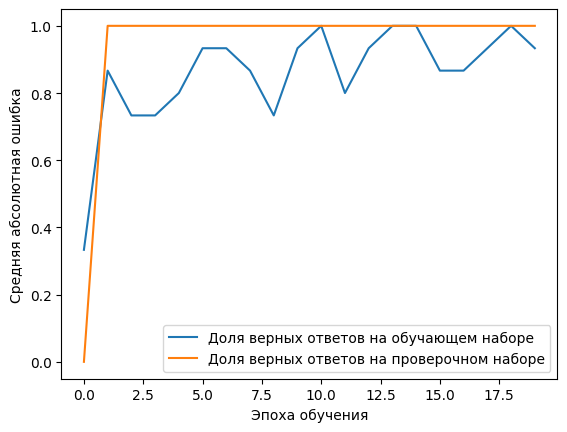

In [ ]:
# Визуализация точности на обучающей выборке
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе') #mae
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе') #val_mae
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Проверка работы сети - предсказание на тренировочной выборке
pred = model.predict(x_train)

# Расчет среднего значения ошибки 
print((abs(pred - y_train)).mean())         # Расчет вручную
print(mean_absolute_error(pred, y_train))   # Расчет с помощью готовой функции

1/1 [==============================] - 0s 87ms/step
0.20331759192049503
0.20331759192049503
